<a href="https://colab.research.google.com/github/yashgoyal24/Car-Rental-Management-System/blob/master/ML_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data


In [ ]:
import pandas as pd


In [ ]:
import glob
all_files=[]
for csv in glob.glob("/content/drive/MyDrive/ML Project/*.csv"):
    all_files.append(csv)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
all_files.remove("/content/drive/MyDrive/ML Project/unclean cclass.csv")
all_files.remove("/content/drive/MyDrive/ML Project/unclean focus.csv")

In [ ]:
dfall=[]
for i in range(len(all_files)):
  dfall.append(pd.read_csv(all_files[i]))
  name=all_files[i][34:-4]
  dfall[i]["type"] = name
dfall

[        model  year  price transmission  ...  tax   mpg  engineSize  type
 0       T-Roc  2019  25000    Automatic  ...  145  49.6         2.0    vw
 1       T-Roc  2019  26883    Automatic  ...  145  49.6         2.0    vw
 2       T-Roc  2019  20000       Manual  ...  145  50.4         2.0    vw
 3       T-Roc  2019  33492    Automatic  ...  145  32.5         2.0    vw
 4       T-Roc  2019  22900    Semi-Auto  ...  150  39.8         1.5    vw
 ...       ...   ...    ...          ...  ...  ...   ...         ...   ...
 15152     Eos  2012   5990       Manual  ...  125  58.9         2.0    vw
 15153     Fox  2008   1799       Manual  ...  145  46.3         1.2    vw
 15154     Fox  2009   1590       Manual  ...  200  42.0         1.4    vw
 15155     Fox  2006   1250       Manual  ...  150  46.3         1.2    vw
 15156     Fox  2007   2295       Manual  ...  145  46.3         1.2    vw
 
 [15157 rows x 10 columns],
            model  year  price transmission  ...  tax   mpg  engineSiz

In [ ]:
#taking same column dfs
dfall = [x for x in dfall if not len(x.columns) != 10]
#setting same name for columns
col_names=list(dfall[0].columns)
for i in dfall:
  i.columns=col_names

#merge all into one single df

final_df=pd.DataFrame()
for i in dfall:
  final_df=final_df.append(i)


In [ ]:
#final_df.index=len(final_df)
final_df.index=list(range(len(final_df)))
print(final_df.describe())
final_df.info()

               year          price  ...           mpg    engineSize
count  99187.000000   99187.000000  ...  99187.000000  99187.000000
mean    2017.087723   16805.347656  ...     55.166825      1.663280
std        2.123934    9866.773417  ...     16.138522      0.557646
min     1970.000000     450.000000  ...      0.300000      0.000000
25%     2016.000000    9999.000000  ...     47.100000      1.200000
50%     2017.000000   14495.000000  ...     54.300000      1.600000
75%     2019.000000   20870.000000  ...     62.800000      2.000000
max     2060.000000  159999.000000  ...    470.800000      6.600000

[8 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 

In [ ]:
#year maximum value is 2060,remove that record
final_df["year"].unique()
final_df=final_df[final_df["year"]<=2020]
final_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,type
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,vw
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,vw
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,vw
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,vw
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,vw
...,...,...,...,...,...,...,...,...,...,...
99182,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,hyundi
99183,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,hyundi
99184,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,hyundi
99185,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,hyundi


Checking Boxplots

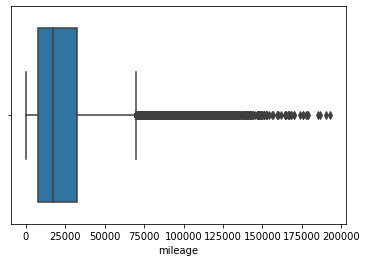

In [ ]:
import seaborn as sns
mileage_box = sns.boxplot(x = 'mileage', data =final_df)

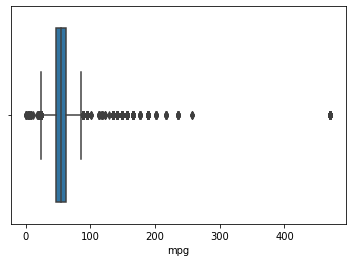

In [ ]:
mpg_box = sns.boxplot(x = 'mpg', data =final_df)

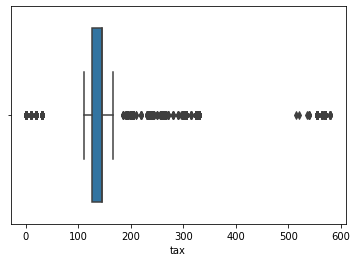

In [ ]:
tax_box = sns.boxplot(x = 'tax', data =final_df)

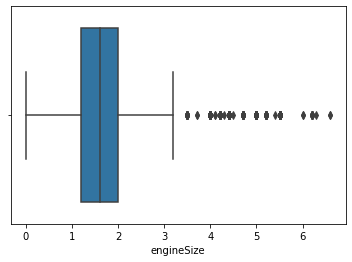

In [ ]:
engine_box = sns.boxplot(x = 'engineSize', data =final_df)

Removing outliers

In [ ]:
final_df=final_df[final_df["mileage"]<=200000]
final_df=final_df[final_df["mpg"]<=300]
final_df=final_df[final_df["tax"]<=400]
#final_df=final_df[final_df["tax"]>=50]

Boxplots after removing outliers

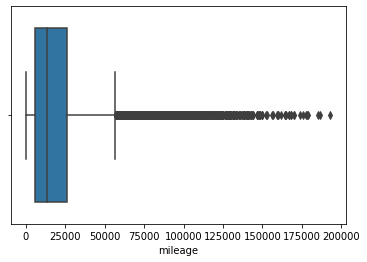

In [ ]:
mileage_box = sns.boxplot(x = 'mileage', data =final_df)

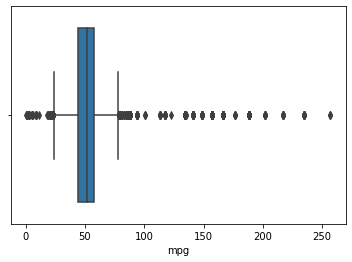

In [ ]:
mpg_box = sns.boxplot(x = 'mpg', data =final_df)

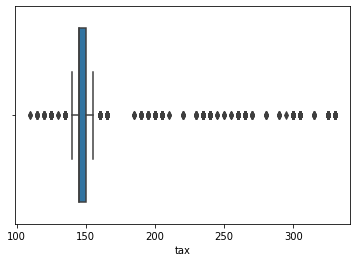

In [ ]:
tax_box = sns.boxplot(x = 'tax', data =final_df)

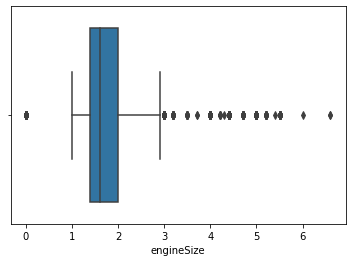

In [ ]:
engine_box = sns.boxplot(x = 'engineSize', data =final_df)

Correlation between features

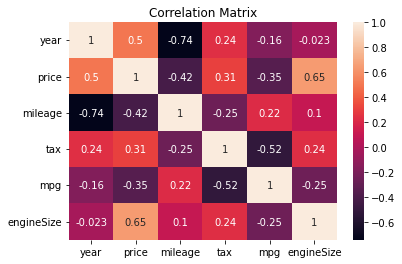

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(final_df.corr(),annot = True)
plt.title("Correlation Matrix")
plt.show()

Pairplot

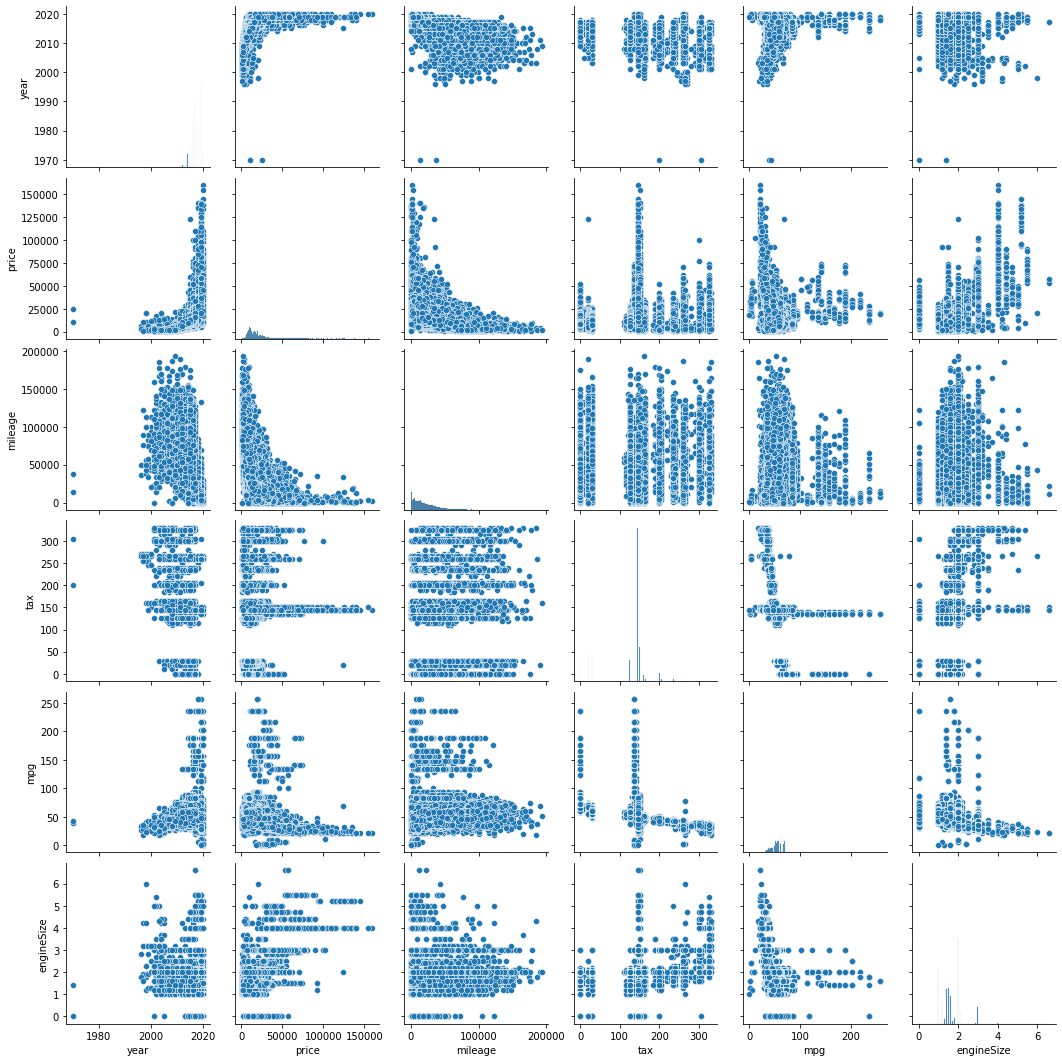

In [ ]:
sns.pairplot(final_df)
plt.show()

Encoding the categorical attributes using One Hot Encoding


In [ ]:
pip install category_encoders

     |████████████████████████████████| 82 kB 301 kB/s 


In [ ]:
import sklearn
from sklearn import preprocessing

final_df_encoded = final_df.copy()
onehot_encoded_df=pd.get_dummies(final_df_encoded, columns = ['model','transmission','fuelType','type'])

onehot_encoded_df

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ A Class,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Accent,model_ Adam,model_ Agila,model_ Amarok,model_ Amica,model_ Ampera,model_ Antara,model_ Arteon,model_ Astra,model_ Auris,model_ Avensis,model_ Aygo,model_ B Class,model_ B-MAX,model_ Beetle,model_ C Class,model_ C-HR,...,model_ Verso-S,model_ Viva,model_ Vivaro,model_ X-CLASS,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Yaris,model_ Yeti,model_ Yeti Outdoor,model_ Z3,model_ Z4,model_ Zafira,model_ Zafira Tourer,model_ i8,model_180,model_200,model_220,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,type_audi,type_bmw,type_ford,type_hyundi,type_merc,type_skoda,type_toyota,type_vauxhall,type_vw
0,2019,25000,13904,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2019,26883,4562,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2019,20000,7414,145,50.4,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2019,33492,4825,145,32.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2019,22900,6500,150,39.8,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2016,8680,25906,0,78.4,1.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99183,2015,7830,59508,30,65.7,1.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99184,2017,6830,13810,20,60.1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
99185,2018,13994,23313,145,44.8,1.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


normalizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

normalized_data=onehot_encoded_df.copy()
columns=["year", "mileage", "tax", "mpg", "engineSize"]
for c in columns:
  normalized_data[c]=(normalized_data[c]-normalized_data[c].min())/(normalized_data[c].max()-normalized_data[c].min())

normalized_data

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ A Class,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Accent,model_ Adam,model_ Agila,model_ Amarok,model_ Amica,model_ Ampera,model_ Antara,model_ Arteon,model_ Astra,model_ Auris,model_ Avensis,model_ Aygo,model_ B Class,model_ B-MAX,model_ Beetle,model_ C Class,model_ C-HR,...,model_ Verso-S,model_ Viva,model_ Vivaro,model_ X-CLASS,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Yaris,model_ Yeti,model_ Yeti Outdoor,model_ Z3,model_ Z4,model_ Zafira,model_ Zafira Tourer,model_ i8,model_180,model_200,model_220,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,type_audi,type_bmw,type_ford,type_hyundi,type_merc,type_skoda,type_toyota,type_vauxhall,type_vw
0,0.98,25000,0.072037,0.439394,0.192203,0.303030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.98,26883,0.023632,0.439394,0.192203,0.303030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.98,20000,0.038410,0.439394,0.195322,0.303030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.98,33492,0.024995,0.439394,0.125536,0.303030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0.98,22900,0.033674,0.454545,0.153996,0.227273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,0.92,8680,0.134223,0.000000,0.304483,0.242424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99183,0.90,7830,0.308328,0.090909,0.254971,0.257576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99184,0.94,6830,0.071550,0.060606,0.233138,0.151515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
99185,0.96,13994,0.120788,0.439394,0.173489,0.242424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


splitting the data into train test

In [ ]:
from sklearn.model_selection import train_test_split

normalized_data=onehot_encoded_df
x_train, x_test, y_train, y_test = train_test_split(
     normalized_data.drop(['price'],axis=1), normalized_data['price'], test_size=0.20, random_state=42)

Baseline 1 - Linear Regression on encoded data


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

linear_reg=linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
y_pred=linear_reg.predict(x_test)
y_pred_train=linear_reg.predict(x_train)

Evaluating metrics

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse_score=np.sqrt(mean_squared_error(y_train,y_pred_train))
mse_score=(mean_squared_error(y_train,y_pred_train))
rsq_score=r2_score(y_train,y_pred_train)
print('RMSE score',rmse_score)
print('MSE score',mse_score)
print('R Square score',rsq_score)



rmse_score=np.sqrt(mean_squared_error(y_test,y_pred))
mse_score=(mean_squared_error(y_test,y_pred))
rsq_score=r2_score(y_test,y_pred)
print('RMSE score',rmse_score)
print('MSE score',mse_score)
print('R Square score',rsq_score)

RMSE score 3647.1806272444396
MSE score 13301926.527747143
R Square score 0.8633230085906887
RMSE score 3463.368174025533
MSE score 11994919.108852955
R Square score 0.8727517950590863


plotting Actual Price vs Predicted Price

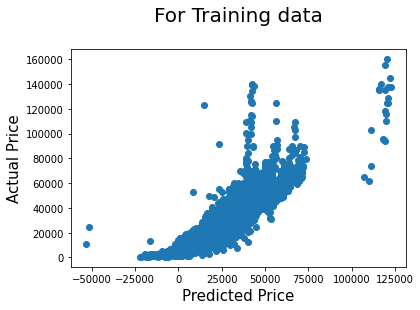

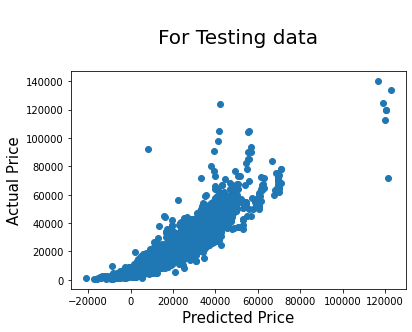

In [ ]:
import matplotlib.pyplot as plt
 
y_pred_test=linear_reg.predict(x_test)
y_pred_train=linear_reg.predict(x_train)

plt.scatter(y_pred_train,y_train)
plt.title("For Training data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

plt.scatter(y_pred_test,y_test)
plt.title("\nFor Testing data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

Baseline 2 - Ridge Regression on encoded data

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

ridge_reg=linear_model.Ridge()
ridge_reg.fit(x_train,y_train)
y_pred=ridge_reg.predict(x_test)

Evaluating Metrics


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rmse_score=np.sqrt(mean_squared_error(y_test,y_pred))
rsq_score=r2_score(y_test,y_pred)
mse_score=(mean_squared_error(y_test,y_pred))
print('RMSE score',rmse_score)
print('MSE score',mse_score)
print('R Square score',rsq_score)

RMSE score 3577.3743283021868
MSE score 12797607.084795522
R Square score 0.8670330977681118


plotting actual price vs predicted price

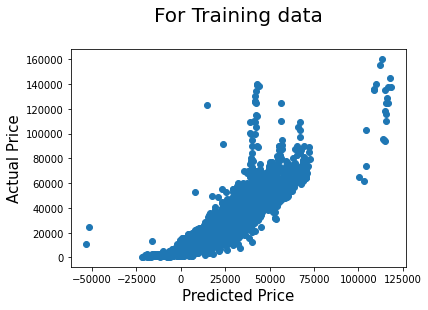

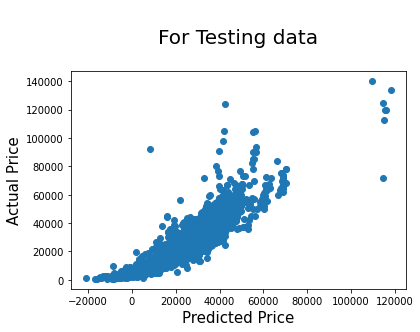

In [ ]:
import matplotlib.pyplot as plt
 
y_pred_test=ridge_reg.predict(x_test)
y_pred_train=ridge_reg.predict(x_train)

plt.scatter(y_pred_train,y_train)
plt.title("For Training data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

plt.scatter(y_pred_test,y_test)
plt.title("\nFor Testing data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

Rnadom Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

rgm = RandomForestRegressor()
rgm.fit(x_train, y_train)

#print('Random Forest Regressor Train Score is : ' , rgm.score(x_train, y_train))
#print('Random Forest Regressor Test Score is : ' , rgm.score(x_test, y_test))

print('\nRandom Forest Regressor Train MSE is : ' , mean_squared_error(rgm.predict(x_train),y_train))
print('Random Forest Regressor Test MSE is : ' , mean_squared_error(rgm.predict(x_test),y_test))

print('\nRandom Forest Regressor Train RMSE is : ' ,np.sqrt(mean_squared_error(rgm.predict(x_train),y_train)))
print('Random Forest Regressor Test RMSE is : ' , np.sqrt(mean_squared_error(rgm.predict(x_test),y_test)))

print('\nRandom Forest Regressor R2 score is : ' , r2_score(rgm.predict(x_train),y_train))
print('Random Forest Regressor Test R2 score is : ' , r2_score(rgm.predict(x_test),y_test))


Random Forest Regressor Train MSE is :  542942.9732713966
Random Forest Regressor Test MSE is :  3803163.271332269

Random Forest Regressor Train RMSE is :  736.8466416232054
Random Forest Regressor Test RMSE is :  1950.1700621567004

Random Forest Regressor R2 score is :  0.9942746913139379
Random Forest Regressor Test R2 score is :  0.9597524324430439


grid search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib

n_estimators = list(range(50,100,10))
max_features = ['auto', 'sqrt']
#max_features = ['auto']
max_depth = list(range(30,70,10))
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
#bootstrap = [False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=2 ,n_iter = 10, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)

rf_random.best_params_



In [ ]:
import joblib
joblib.dump(rf_random.best_params_,'/content/drive/My Drive/randomforest_bestparam')


In [ ]:
import joblib
best_param=joblib.load('/content/drive/My Drive/randomforest_bestparam')
best_param

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 80}

After grid search

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rgm = RandomForestRegressor(n_estimators=80,max_depth=60, random_state=42,min_samples_leaf=1,min_samples_split=10)
rgm.fit(x_train, y_train)

print('\nRandom Forest Regressor Train MSE is : ' , mean_squared_error(rgm.predict(x_train),y_train))
print('Random Forest Regressor Test MSE is : ' , mean_squared_error(rgm.predict(x_test),y_test))

print('\nRandom Forest Regressor Train RMSE is : ' ,np.sqrt(mean_squared_error(rgm.predict(x_train),y_train)))
print('Random Forest Regressor Test RMSE is : ' , np.sqrt(mean_squared_error(rgm.predict(x_test),y_test)))

print('\nRandom Forest Regressor R2 score is : ' , r2_score(rgm.predict(x_train),y_train))
print('Random Forest Regressor Test R2 score is : ' , r2_score(rgm.predict(x_test),y_test))


Random Forest Regressor Train MSE is :  1507234.2776309329
Random Forest Regressor Test MSE is :  3668163.902117861

Random Forest Regressor Train RMSE is :  1227.694700498024
Random Forest Regressor Test RMSE is :  1915.2451284673357

Random Forest Regressor R2 score is :  0.9839271194537439
Random Forest Regressor Test R2 score is :  0.9610530426251345


Plotting actual price vs predicted price

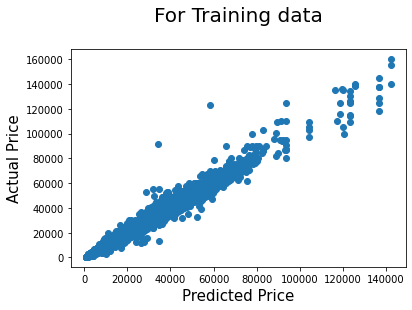

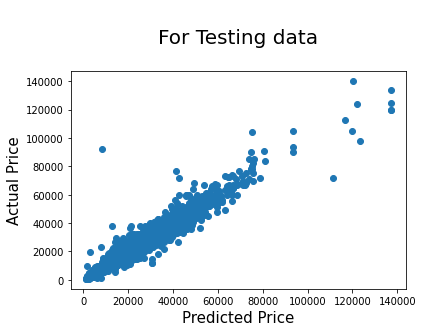

In [ ]:
import matplotlib.pyplot as plt
 
y_pred_test=rgm.predict(x_test)
y_pred_train=rgm.predict(x_train)

plt.scatter(y_pred_train,y_train)
plt.title("For Training data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

plt.scatter(y_pred_test,y_test)
plt.title("\nFor Testing data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

gradient boosted regression tree

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


grad_reg = GradientBoostingRegressor()
grad_reg.fit(x_train, y_train)

print('\nGradient boosted Regressor Train MSE is : ' , mean_squared_error(grad_reg.predict(x_train),y_train))
print('Gradient boosted Regressor Test MSE is : ' , mean_squared_error(grad_reg.predict(x_test),y_test))

print('\nGradient boosted Regressor Train RMSE is : ' ,np.sqrt(mean_squared_error(grad_reg.predict(x_train),y_train)))
print('Gradient boosted Regressor Test RMSE is : ' , np.sqrt(mean_squared_error(grad_reg.predict(x_test),y_test)))

print('\nGradient boosted Regressor R2 score is : ' , r2_score(grad_reg.predict(x_train),y_train))
print('Gradient boosted Regressor Test R2 score is : ' , r2_score(grad_reg.predict(x_test),y_test))


Gradient boosted Regressor Train MSE is :  9325518.558858879
Gradient boosted Regressor Test MSE is :  9334708.5221225

Gradient boosted Regressor Train RMSE is :  3053.7712027686157
Gradient boosted Regressor Test RMSE is :  3055.2755231112137

Gradient boosted Regressor R2 score is :  0.8857223668075311
Gradient boosted Regressor Test R2 score is :  0.8856601933432184


Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import joblib


n_estimators = list(range(50,100,10))
learning_rate:[.001,0.01,.1]
#max_features = ['auto', 'sqrt']
max_features = ['auto']
max_depth = list(range(30,70,10))
max_depth.append(None)
min_samples_leaf = [1, 2, 4]
subsample=[.5,.75,1]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
                'subsample' : subsample}

gbr = GradientBoostingRegressor()
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, cv=2 ,n_iter = 10, verbose=2, random_state=42, n_jobs = -1)
gbr_random.fit(x_train,y_train)

gbr_random.best_params_



In [ ]:
import joblib
joblib.dump(gbr_random.best_params_,'/content/drive/My Drive/gradboost_bestparam')

In [ ]:
import joblib
best_param=joblib.load('/content/drive/My Drive/gradboost_bestparam')
best_param

{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 50,
 'subsample': 0.5}

After grid search

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


grad_reg = GradientBoostingRegressor(max_depth=50, max_features='auto',min_samples_leaf=4,n_estimators=50,subsample=0.5)
grad_reg.fit(x_train, y_train)

print('\nGradient boosted Regressor Train MSE is : ' , mean_squared_error(grad_reg.predict(x_train),y_train))
print('Gradient boosted Regressor Test MSE is : ' , mean_squared_error(grad_reg.predict(x_test),y_test))

print('\nGradient boosted Regressor Train RMSE is : ' ,np.sqrt(mean_squared_error(grad_reg.predict(x_train),y_train)))
print('Gradient boosted Regressor Test RMSE is : ' , np.sqrt(mean_squared_error(grad_reg.predict(x_test),y_test)))

print('\nGradient boosted Regressor R2 score is : ' , r2_score(grad_reg.predict(x_train),y_train))
print('Gradient boosted Regressor Test R2 score is : ' , r2_score(grad_reg.predict(x_test),y_test))


Gradient boosted Regressor Train MSE is :  900107.1742239825
Gradient boosted Regressor Test MSE is :  3575086.770009098

Gradient boosted Regressor Train RMSE is :  948.7397821447051
Gradient boosted Regressor Test RMSE is :  1890.7899856962163

Gradient boosted Regressor R2 score is :  0.9904180578751995
Gradient boosted Regressor Test R2 score is :  0.9615814501905943


Plotting actual price vs predicted price

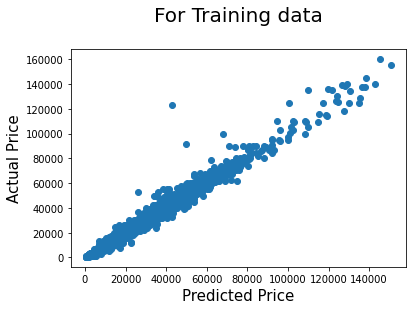

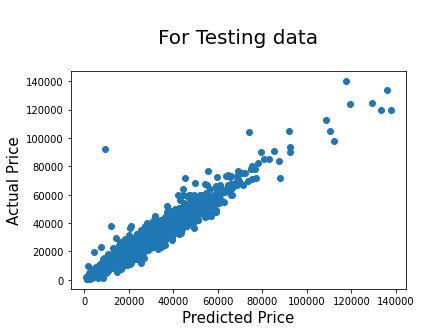

In [ ]:
import matplotlib.pyplot as plt
 
y_pred_test=grad_reg.predict(x_test)
y_pred_train=grad_reg.predict(x_train)

plt.scatter(y_pred_train,y_train)
plt.title("For Training data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

plt.scatter(y_pred_test,y_test)
plt.title("\nFor Testing data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

elastic net regression

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet()
elastic_reg.fit(x_train, y_train)

print('\nelasticnet Regressor Train MSE is : ' , mean_squared_error(elastic_reg.predict(x_train),y_train))
print('elasticnet Regressor Test MSE is : ' , mean_squared_error(elastic_reg.predict(x_test),y_test))

print('\nelasticnet Regressor Train RMSE is : ' ,np.sqrt(mean_squared_error(elastic_reg.predict(x_train),y_train)))
print('elasticnet Regressor Test RMSE is : ' , np.sqrt(mean_squared_error(elastic_reg.predict(x_test),y_test)))

print('\nelasticnet Regressor R2 score is : ' , r2_score(elastic_reg.predict(x_train),y_train))
print('elasticnet Regressor Test R2 score is : ' , r2_score(elastic_reg.predict(x_test),y_test))


elasticnet Regressor Train MSE is :  33768615.24836881
elasticnet Regressor Test MSE is :  32766434.576342434

elasticnet Regressor Train RMSE is :  5811.0769439380865
elasticnet Regressor Test RMSE is :  5724.197286637003

elasticnet Regressor R2 score is :  0.19602655996128793
elasticnet Regressor Test R2 score is :  0.21708448314034656


Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from numpy import arange
import joblib

#grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
#grid['l1_ratio'] = arange(0, 1, 0.01)

random_grid = { 'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
                 'l1_ratio' :  arange(0, 1, 0.01)
                }

elastic_reg = ElasticNet(random_state=0)
gbr_random = RandomizedSearchCV(estimator = elastic_reg, param_distributions = random_grid, cv=2 ,n_iter = 10, verbose=2, random_state=42, n_jobs = -1)
gbr_random.fit(x_train,y_train)

gbr_random.best_params_



After grid search

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha= 1e-05, l1_ratio= 0.86)
elastic_reg.fit(x_train, y_train)

print('\n\nelasticnet Regressor Train MSE is : ' , mean_squared_error(elastic_reg.predict(x_train),y_train))
print('elasticnet Regressor Test MSE is : ' , mean_squared_error(elastic_reg.predict(x_test),y_test))

print('\nelasticnet Regressor Train RMSE is : ' ,np.sqrt(mean_squared_error(elastic_reg.predict(x_train),y_train)))
print('elasticnet Regressor Test RMSE is : ' , np.sqrt(mean_squared_error(elastic_reg.predict(x_test),y_test)))

print('\nelasticnet Regressor R2 score is : ' , r2_score(elastic_reg.predict(x_train),y_train))
print('elasticnet Regressor Test R2 score is : ' , r2_score(elastic_reg.predict(x_test),y_test))



elasticnet Regressor Train MSE is :  13102598.841237012
elasticnet Regressor Test MSE is :  12795147.943796646

elasticnet Regressor Train RMSE is :  3619.751212616278
elasticnet Regressor Test RMSE is :  3577.0306042577613

elasticnet Regressor R2 score is :  0.8433882323526775
elasticnet Regressor Test R2 score is :  0.8496831185362274


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.199e+11, tolerance: 7.665e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


plotting Actual price vs predicted price

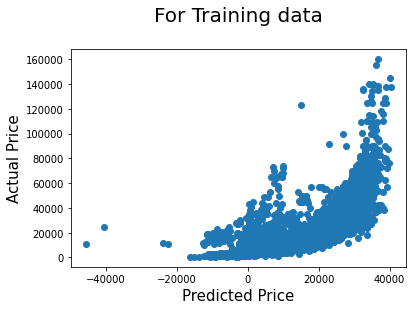

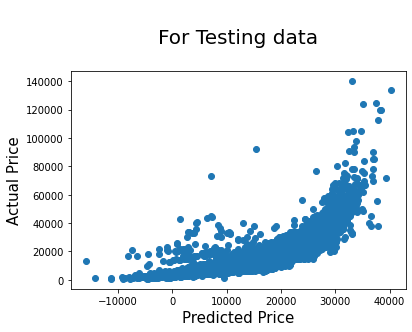

In [ ]:
import matplotlib.pyplot as plt
 
y_pred_test=elastic_reg.predict(x_test)
y_pred_train=elastic_reg.predict(x_train)

plt.scatter(y_pred_train,y_train)
plt.title("For Training data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

plt.scatter(y_pred_test,y_test)
plt.title("\nFor Testing data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

DNN model

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras

def build_neural(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=len(list(x_train))))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=opt)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_neural)

parameters = {
    "n_hidden": range(5),
    "n_neurons": range(100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

#keras_reg.fit(x_train,y_train)

random_search = RandomizedSearchCV(keras_reg, parameters, n_iter=10, cv=3)
random_search.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
random_search.best_params_

{'learning_rate': 0.004011440193472148, 'n_hidden': 3, 'n_neurons': 34}

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras


def build_neural(n_hidden=3, n_neurons=34, learning_rate=0.004011440193472148):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=len(list(x_train))))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1,activation="linear"))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=opt)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_neural)
keras_reg.fit(x_train,y_train,epochs=15)
y_pred=keras_reg.predict(x_test)
mean_squared_error(y_pred,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
import numpy as np

print('\nDNN model Train MSE is : ' , mean_squared_error(keras_reg.predict(x_train),y_train))
print('DNN model Test MSE is : ' , mean_squared_error(keras_reg.predict(x_test),y_test))

print('\nDNN model Train RMSE is : ' ,np.sqrt(mean_squared_error(keras_reg.predict(x_train),y_train)))
print('DNN model Test RMSE is : ' , np.sqrt(mean_squared_error(keras_reg.predict(x_test),y_test)))

print('\nDNN model R2 score is : ' , r2_score(keras_reg.predict(x_train),y_train))
print('DNN model Test R2 score is : ' , r2_score(keras_reg.predict(x_test),y_test))


DNN model Train MSE is :  12478459.464876812
DNN model Test MSE is :  12242588.8945217

DNN model Train RMSE is :  3532.4863007344857
DNN model Test RMSE is :  3498.9411104678084

DNN model R2 score is :  0.8458491205251676
DNN model Test R2 score is :  0.8481603421760344


Plotting Actual Price vs predicted price

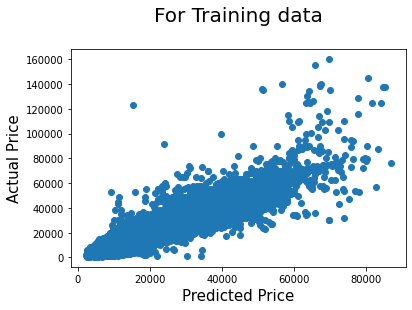

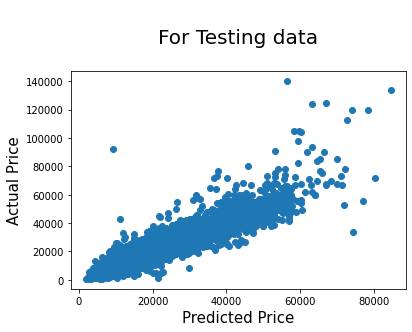

In [ ]:
import matplotlib.pyplot as plt
 
y_pred_test=keras_reg.predict(x_test)
y_pred_train=keras_reg.predict(x_train)

plt.scatter(y_pred_train,y_train)
plt.title("For Training data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

plt.scatter(y_pred_test,y_test)
plt.title("\nFor Testing data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

Ranking model according to RMSE value 

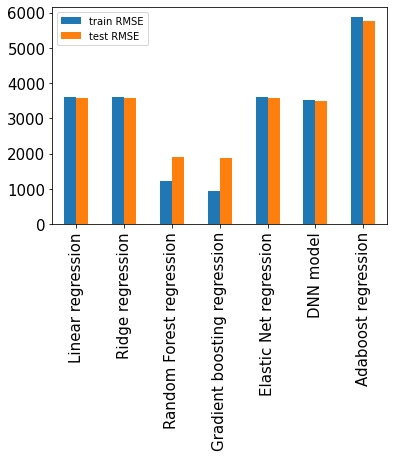

In [ ]:
import numpy as np
import pandas as pd

linear_testrmse=np.sqrt(mean_squared_error(linear_reg.predict(x_test),y_test))
ridge_testrmse=np.sqrt(mean_squared_error(ridge_reg.predict(x_test),y_test))
randomforest_testrmse=np.sqrt(mean_squared_error(rgm.predict(x_test),y_test))
gradboost_testrmse=np.sqrt(mean_squared_error(grad_reg.predict(x_test),y_test))
elasticnet_testrmse=np.sqrt(mean_squared_error(elastic_reg.predict(x_test),y_test))
DNN_testrmse=np.sqrt(mean_squared_error(keras_reg.predict(x_test),y_test))
adaboost_testrmse=np.sqrt(33308567.616176102)

linear_trainrmse=np.sqrt(mean_squared_error(linear_reg.predict(x_train),y_train))
ridge_trainrmse=np.sqrt(mean_squared_error(ridge_reg.predict(x_train),y_train))
randomforest_trainrmse=np.sqrt(mean_squared_error(rgm.predict(x_train),y_train))
gradboost_trainrmse=np.sqrt(mean_squared_error(grad_reg.predict(x_train),y_train))
elasticnet_trainrmse=np.sqrt(mean_squared_error(elastic_reg.predict(x_train),y_train))
DNN_trainrmse=np.sqrt(mean_squared_error(keras_reg.predict(x_train),y_train))
adaboost_trainrmse=np.sqrt(34390664.8890632)


test_rmse=[linear_testrmse,ridge_testrmse,randomforest_testrmse,gradboost_testrmse,elasticnet_testrmse,DNN_testrmse,adaboost_testrmse]
train_rmse=[linear_trainrmse,ridge_trainrmse,randomforest_trainrmse,gradboost_trainrmse,elasticnet_trainrmse,DNN_trainrmse,adaboost_trainrmse]

col={'train RMSE':train_rmse,'test RMSE':test_rmse}
models=['Linear regression','Ridge regression','Random Forest regression','Gradient boosting regression','Elastic Net regression','DNN model','Adaboost regression']
df=pd.DataFrame(data=col,index=models)
df.plot(kind='bar',fontsize=15)
